In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
ss = StandardScaler()
X[["age"]] = ss.fit_transform(X[["age"]])
X[["trestbps"]] = ss.fit_transform(X[["trestbps"]])
X[["chol"]] = ss.fit_transform(X[["chol"]])
X[["thalach"]] = ss.fit_transform(X[["thalach"]])
X[["oldpeak"]] = ss.fit_transform(X[["oldpeak"]])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [1, 3, 5, 7, 9]}
grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = "accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, scoring='accuracy')

In [6]:
grid.best_params_

{'n_neighbors': 7}

In [7]:
best = grid.best_estimator_
best

KNeighborsClassifier(n_neighbors=7)

In [8]:
y_pred = best.predict(X_test)
accuracy_score(y_test, y_pred)

0.8688524590163934

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  4]
 [ 4 28]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



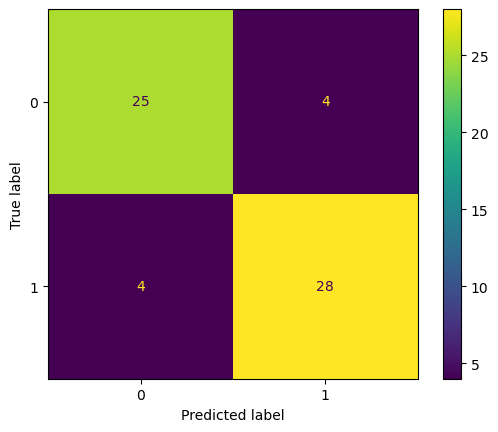

In [26]:
cm_display = ConfusionMatrixDisplay(cm, display_labels = best.classes_)
cm_display.plot()
plt.show()